# Lending Club Default Analysis

**Background:**
Lending club is the largest peer-to-peer marketplace connecting borrowers with lenders. Borrowers apply
through an online platform where they are assigned an internal score. 
Lenders decide whether to lend and the terms of loan such as interest rate, monthly instalment, tenure etc.

Some popular products are credit card loans, debt consolidation loans, house loans, car loans etc.

**Business Objective:**
To identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\lending club\loan.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking for null values:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [4]:
#Missing values in terms of percentages:
round((df.isnull().sum()/len(df.index))*100,2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [5]:
#Removing columns with 100% missing values:
round((df.isnull().sum()/len(df.index))*100,2)==100

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                     False
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

In [6]:
#Columns with 100% missing values:
missing_columns=df.columns[round((df.isnull().sum()/len(df.index))*100,2)==100]
missing_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [7]:
#Dropping the above columns:
df.drop(missing_columns,axis=1,inplace=True)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [8]:
#Again check for null value percentage:
round((df.isnull().sum()/len(df.index))*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [9]:
#Droping columns with >90% missing values:
df.drop(['mths_since_last_record','next_pymnt_d'],axis=1,inplace=True)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [10]:
#Again check for null value percentage:
round((df.isnull().sum()/len(df.index))*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent
# let's have a look at a few entries in the columns:
df[['desc','mths_since_last_delinq']]

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...
39712,Our current gutter system on our home is old a...,0.0
39713,The rate of interest and fees incurred by carr...,5.0
39714,NaN,0.0
39715,NaN,0.0


The column description contains the comments the applicant had written while applying for the loan. This column is of no use in this analysis.

Secondly, months since last delinquent represents the number months passed since the person last fell into the 90 DPD group. Since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval. 

Thus we will drop the two columns.

In [12]:
df.drop(['desc','mths_since_last_delinq'],axis=1,inplace=True)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [13]:
#Again check for null value percentage:
round((df.isnull().sum()/len(df.index))*100,2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

There are some more columns with missing values, but we will ignore them for now as the % of missing values is too low and moreover impending those will creat a bias.

In [14]:
#Now Checking rows for missing values:
(df.isnull().sum(axis=1)>5).sum()

0

Since No rows contain >5 missing values, implies there is no issue with null values in rows.

In [15]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
# The column int_rate is character type, let's convert it to float:
df['int_rate']=df['int_rate'].apply(lambda x:float(x.split("%")[0])) 
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [18]:
df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [19]:
(df['emp_length'].isnull()).sum()

1075

In [20]:
df['emp_length']=df['emp_length'][~(df['emp_length'].isnull())].apply(lambda x:x.replace('+','')).apply(lambda x:x.replace('<','')).apply(lambda x:x.replace('years','')).apply(lambda x:int(x.replace('year','')))
df['emp_length']

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

## Data Analysis

The variables related to customer behaviour are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 
Thus, we are going to drop the variables related to customer behaviour.

In [21]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [22]:
#Removing the behaviour variables from analysis
df=df.drop(behaviour_var, axis=1)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


In [23]:
# Also, we will not be able to use the variables zip code, address, state etc.
# The variable 'title' is derived from the variable 'purpose'
# Thus we get rid of all these variables as well.
df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,other,17.94,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,home_improvement,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,credit_card,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,debt_consolidation,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,other,3.72,f,NaN,1,0,NaN,0,NaN,NaN


Here the target variable is loan_status. We relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [24]:
#df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so we get rid of the current loans. Also, we tag the other two values as 0 or 1. 

In [25]:
#Dropping rows with loan status as Current:
df=df[~(df['loan_status']=='Current')]
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,home_improvement,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,credit_card,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,debt_consolidation,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,other,3.72,f,NaN,1,0,NaN,0,NaN,NaN


In [26]:
df['loan_status']=df['loan_status'].apply(lambda x:0 if x=='Fully Paid' else 1)
df['loan_status']

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status, Length: 38577, dtype: int64

In [27]:
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [28]:
#Overall default rate:
(((df['loan_status']==1).sum())/len(df.index))*100

14.586411592399617

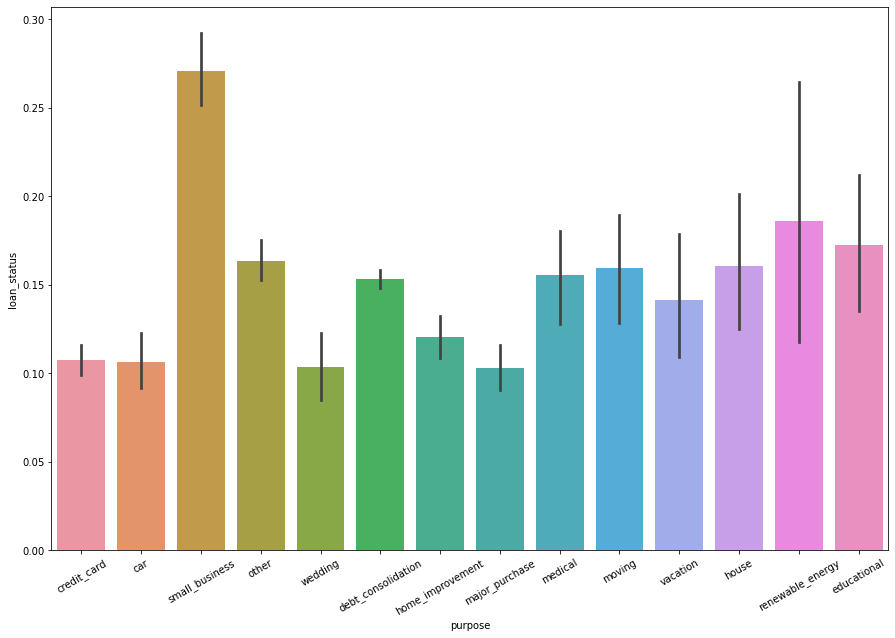

In [29]:
#Plotting for loans of different purposes against defaulties:
plt.figure(figsize=[15,10])
q=sns.barplot(x=df['purpose'],y=df['loan_status'])
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.show()

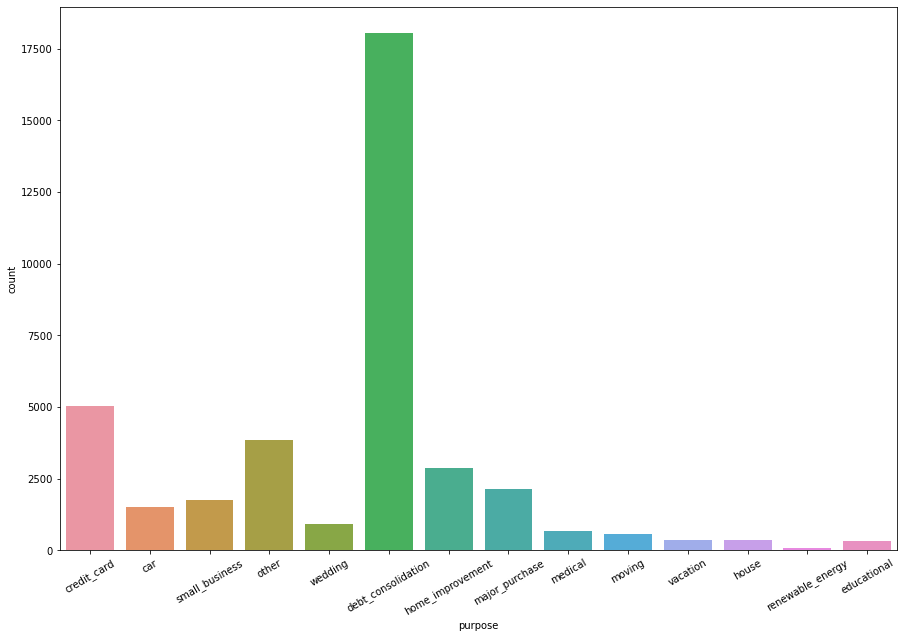

In [30]:
#Plotting for frequency of loans for different purposes:
plt.figure(figsize=[15,10])
q=sns.countplot(x=df['purpose'])
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.show()

**From the above plot it can be inferred that most of the applicants are applying loan for the purpose of debt_consolidation followed by credit car, home improvement and major purchase.**

**Hence filtering the data only for these four major categories in a seperate data frame named df_max_pur**

In [31]:
df_max_pur=df[((df['purpose']=='debt_consolidation') | (df['purpose']=='credit_card') 
      |(df['purpose']=='home_improvement')| (df['purpose']=='major_purchase'))]
df_max_pur

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,debt_consolidation,23.51,f,0.0,1,0,0.0,0,0.0,0.0
10,1070078,1305201,6500,6500,6500.0,60 months,14.65,153.45,C,C3,...,debt_consolidation,16.12,f,0.0,1,0,0.0,0,0.0,0.0
11,1069908,1305008,12000,12000,12000.0,36 months,12.69,402.54,B,B5,...,debt_consolidation,10.78,f,0.0,1,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,...,debt_consolidation,10.08,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,92402,92390,5000,5000,700.0,36 months,8.70,158.30,B,B1,...,credit_card,15.55,f,NaN,1,0,NaN,0,NaN,NaN
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,home_improvement,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,credit_card,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,debt_consolidation,2.30,f,NaN,1,0,NaN,0,NaN,NaN


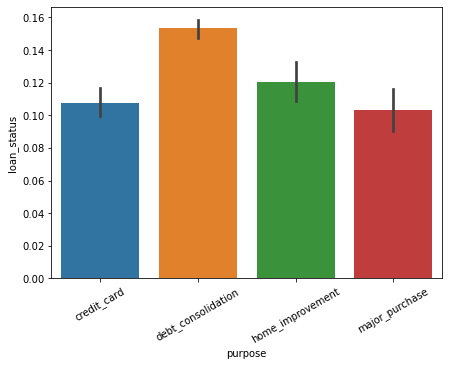

In [32]:
#Plotting for frequency of loans for max 4 purposes:
plt.figure(figsize=[7,5])
q=sns.barplot(x=df_max_pur['purpose'],y=df['loan_status'])
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.show()

**Among the top 4 purposes for which people apply loans, the dept consolidation category is more likely to default followed by home improvement and credit card.**

In [33]:
#Defining a function to plot categorical variables:
def plot_cat(cat_var):
    sns.barplot(x=cat_var,y='loan_status',data=df)
    plt.show()

In [34]:
#Defining a function to plot categorical variables for 4 major purposes:
def plot_cat_max_pur(cat_var):  
    sns.barplot(x=cat_var,y='loan_status',hue='purpose',data=df_max_pur)
    plt.show()

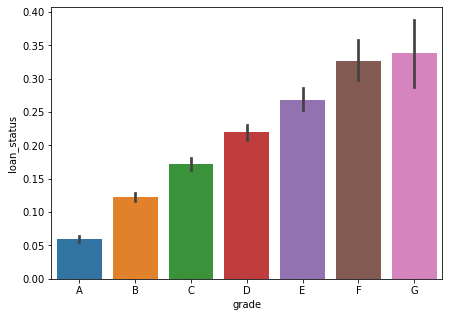

In [35]:
#Plotting default rate accross grade of loan:
plt.figure(figsize=[7,5])
plot_cat(df['grade'].sort_values())

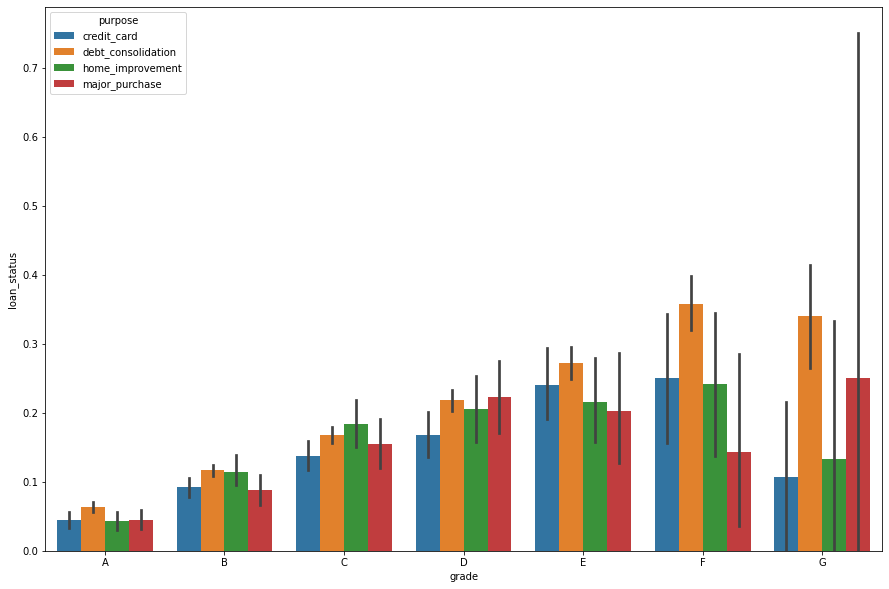

In [36]:
#Plotting default rate accross grade of loan for 4 major purposes:
plt.figure(figsize=[15,10])
plot_cat_max_pur(df['grade'].sort_values())

**From the above plot it can be inferred that as the grade of the applicant degrades, he is more likely to default.**

**And among all the grade categories, the dept consolidation loans are more likely to default.**

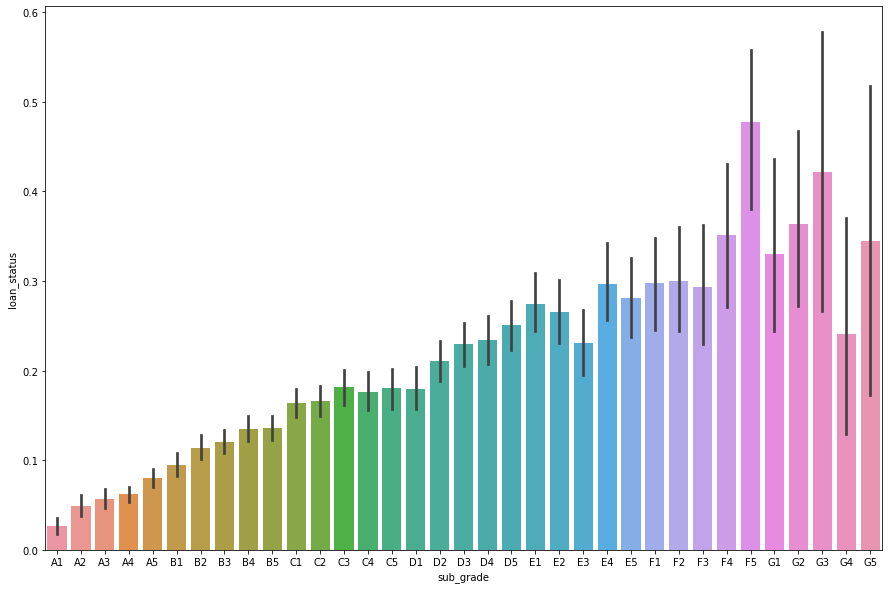

In [37]:
#Plotting for subgrade:
plt.figure(figsize=[15,10])
plot_cat(df['sub_grade'].sort_values())

**From the above plot it can be inferred that subgrades also follows the same pattern as grades.**

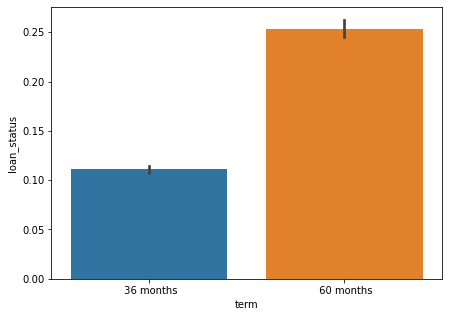

In [38]:
#Plotting for term:
plt.figure(figsize=[7,5])
plot_cat('term')

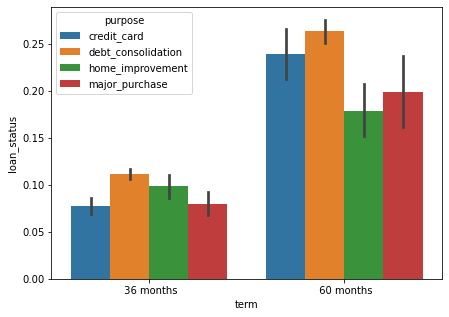

In [39]:
#Plotting for term for 4 major purposes:
plt.figure(figsize=[7,5])
plot_cat_max_pur('term')

**From the above plot it can be inferred that long term loans are more likely to default.**

**And among the two term categories, the dept consolidation loans are more likely to default.**

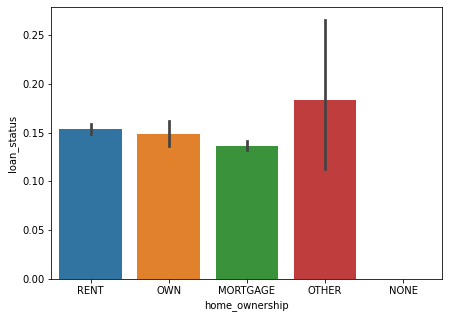

In [40]:
#Plotting for home ownership:
plt.figure(figsize=[7,5])
plot_cat('home_ownership')

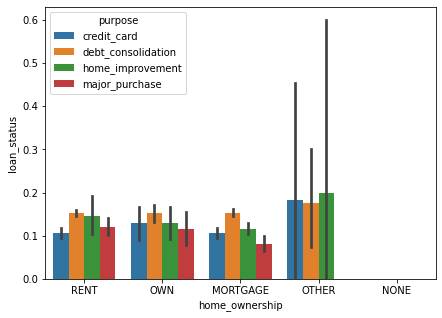

In [41]:
#Plotting for home ownership for 4 major purposes:
plt.figure(figsize=[7,5])
plot_cat_max_pur('home_ownership')

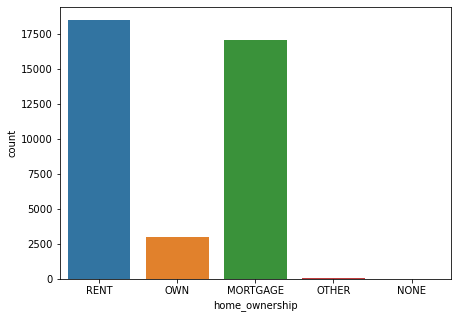

In [42]:
#Plotting frquency of applicants against home ownership:
plt.figure(figsize=[7,5])
sns.countplot(x=df['home_ownership'])

**From the above plots it can be seen that there are significantly more number of applicants with rented home compared to own house. But both are almost equally likely to default.**

**And among most of the home ownership categories, the dept consolidation loans are more likely to default.**

In [43]:
df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

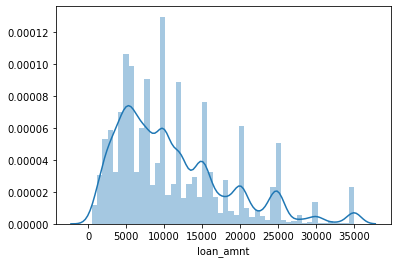

In [44]:
#Now we will analyse how default rate varies accross continuous variable:
sns.distplot(df.loan_amnt)
plt.show()

**The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.**

**Hence binning the loan amount variable into small, medium, high, very high.**

In [45]:
def loan_amt(amt):
    if amt<5000:
        return 'small'
    elif amt>=5000 and amt<15000:
        return 'medium'
    elif amt>=15000 and amt<25000:
        return 'high'
    else:
        return 'very high'

In [46]:
df['loan_amnt']=df['loan_amnt'].apply(lambda x:loan_amt(x))
df['loan_amnt']

0        medium
1         small
2         small
3        medium
5        medium
          ...  
39712     small
39713    medium
39714    medium
39715    medium
39716    medium
Name: loan_amnt, Length: 38577, dtype: object

In [47]:
df_max_pur['loan_amnt']=df_max_pur['loan_amnt'].apply(lambda x:loan_amt(x))
df_max_pur['loan_amnt']

0        medium
6        medium
10       medium
11       medium
12       medium
          ...  
39711    medium
39712     small
39713    medium
39714    medium
39716    medium
Name: loan_amnt, Length: 28107, dtype: object

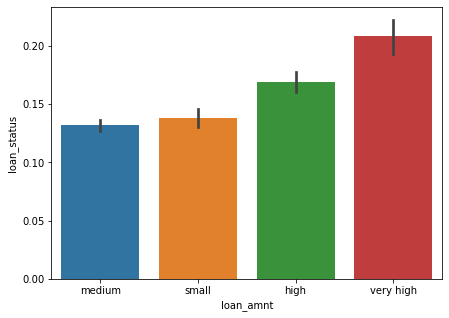

In [48]:
plt.figure(figsize=[7,5])
plot_cat('loan_amnt')

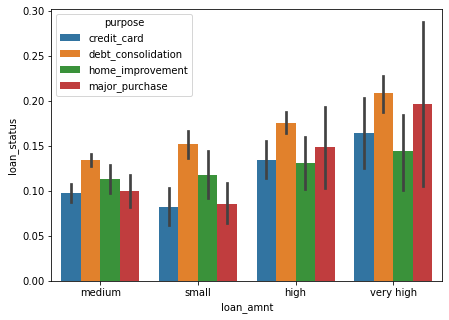

In [49]:
plt.figure(figsize=[7,5])
plot_cat_max_pur('loan_amnt')

**From the above plot it can be inferred that as the loan amount increases the applicant is more likely to default.**

**And among all the loan amount categories, the dept consolidation loans are more likely to default.**

In [50]:
#Now binning interest rate into low, medium high:
df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [51]:
def int_rat(intr):
    if intr<8:
        return 'low'
    elif intr>=8 and intr<13:
        return 'medium'
    else:
        return 'high'

In [52]:
df['int_rate']=df['int_rate'].apply(lambda x:int_rat(x))
df['int_rate']

0        medium
1          high
2          high
3          high
5           low
          ...  
39712    medium
39713    medium
39714    medium
39715       low
39716      high
Name: int_rate, Length: 38577, dtype: object

In [53]:
df_max_pur['int_rate']=df_max_pur['int_rate'].apply(lambda x:int_rat(x))
df_max_pur['int_rate']

0        medium
6          high
10         high
11       medium
12         high
          ...  
39711    medium
39712    medium
39713    medium
39714    medium
39716      high
Name: int_rate, Length: 28107, dtype: object

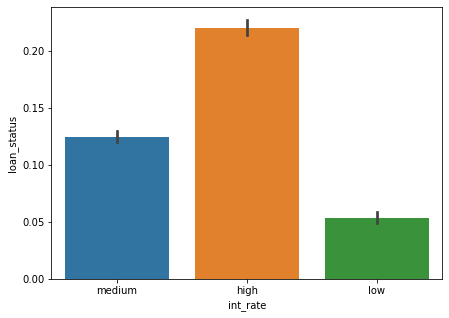

In [54]:
plt.figure(figsize=[7,5])
plot_cat('int_rate')

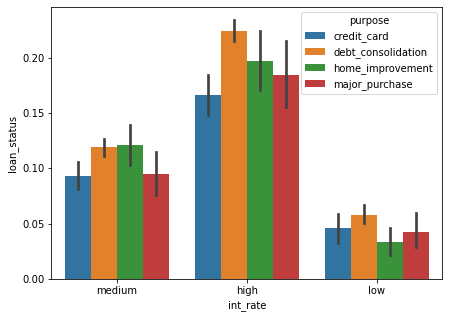

In [55]:
plt.figure(figsize=[7,5])
plot_cat_max_pur('int_rate')

**From the above plot it can be inferred that heigher the rate of interest, higher the default rate**

**And among most of the interest rate categories, the dept consolidation loans are more likely to default.**

In [56]:
df['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [57]:
# Now binning debt to income ratio:
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'

In [58]:
df['dti'] = df['dti'].apply(lambda x: dti(x))
df_max_pur['dti'] = df_max_pur['dti'].apply(lambda x: dti(x))
df['dti']

0          high
1           low
2           low
3        medium
5        medium
          ...  
39712    medium
39713       low
39714       low
39715       low
39716    medium
Name: dti, Length: 38577, dtype: object

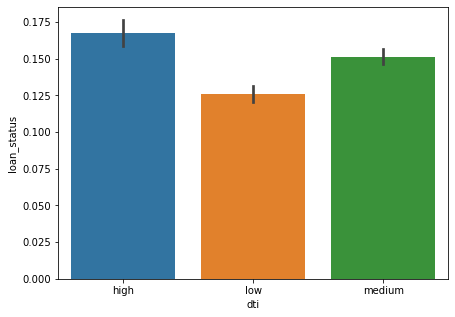

In [59]:
plt.figure(figsize=[7,5])
plot_cat('dti')

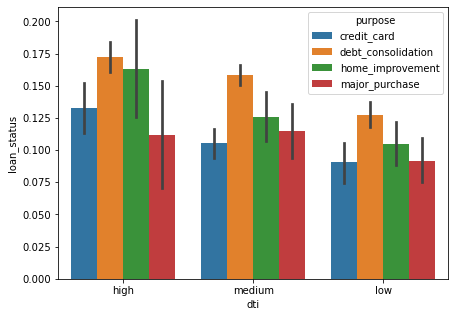

In [60]:
plt.figure(figsize=[7,5])
plot_cat_max_pur('dti')

**From the above plot it can be inferred that heigher the dept to income ratio, higher the default rate**

**And among all the dti categories, the dept consolidation loans are more likely to default.**

In [61]:
df['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [62]:
# Now binning for installments:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'

In [63]:
df['installment'] = df['installment'].apply(lambda x: installment(x))
df_max_pur['installment'] = df_max_pur['installment'].apply(lambda x: installment(x))
df['installment']

0           low
1           low
2           low
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: installment, Length: 38577, dtype: object

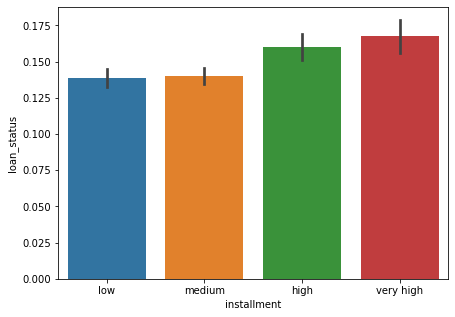

In [64]:
plt.figure(figsize=[7,5])
plot_cat('installment')

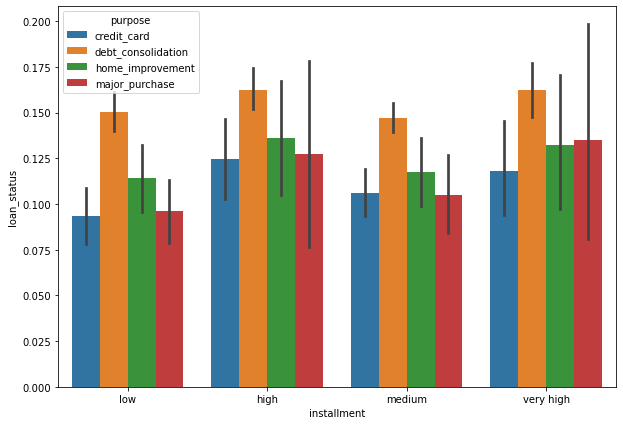

In [65]:
plt.figure(figsize=[10,7])
plot_cat_max_pur('installment')

**From the above plot it can be inferred that heigher the of installment amount, higher the default rate**

**And among all the installment categories, the dept consolidation loans are more likely to default.**

In [66]:
df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [67]:
# Now binning annual income:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

In [68]:
df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))
df_max_pur['annual_inc'] = df_max_pur['annual_inc'].apply(lambda x: annual_income(x))
df['annual_inc']

0              low
1              low
2              low
3              low
5              low
           ...    
39712         high
39713          low
39714       medium
39715    very high
39716          low
Name: annual_inc, Length: 38577, dtype: object

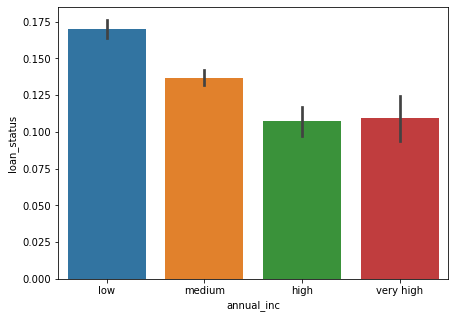

In [69]:
plt.figure(figsize=[7,5])
plot_cat('annual_inc')

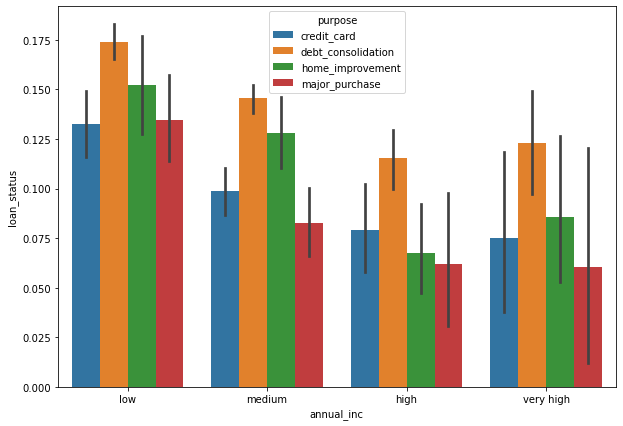

In [70]:
plt.figure(figsize=[10,7])
plot_cat_max_pur('annual_inc')

**From the above plot it can be inferred that lower the annual income, higher the default rate**

**And among all the annual income categories, the dept consolidation loans are more likely to default.**

# Summary:

- Most of the applicants are applying loan for the purpose of debt_consolidation followed by credit car, home improvement and major purchase.
- Among the top 4 purposes for which people apply loans, the dept consolidation category is more likely to default followed by home improvement and credit card.
- There are significantly more number of applicants who are staying in rented home compared to own house. But both are almost equally likely to default.

### The following traits indicate that the applicant is more likely to default:

- Low grade                  : [ *High impact* ]
- Low subgrade               : [ *Medium impact* ]
- High dept to income ratio  : [ *High impact* ]
- High loan amount           : [ *Medium impact* ]
- Long term loans            : [ *High impact* ]
- High installment amount    : [ *Medium impact* ]
- Low annual income          : [ *High impact* ]
- High rate of interest      : [ *High impact* ]
